In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import *
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.svm import *
from sklearn.neighbors import *
from sklearn.metrics import *
import time
import seaborn as sns

In [2]:
#IMPORTING TRAINING DATA
train = pd.read_csv("train.csv")
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Person,Work
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [3]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Person
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [4]:
#COUNTING DIFFERENT CATEGORIES 
train['Work'].groupby(train['Work']).count()

Work
LAYING                1407
SITTING               1286
STANDING              1374
WALKING               1226
WALKING_DOWNSTAIRS     986
WALKING_UPSTAIRS      1073
Name: Work, dtype: int64

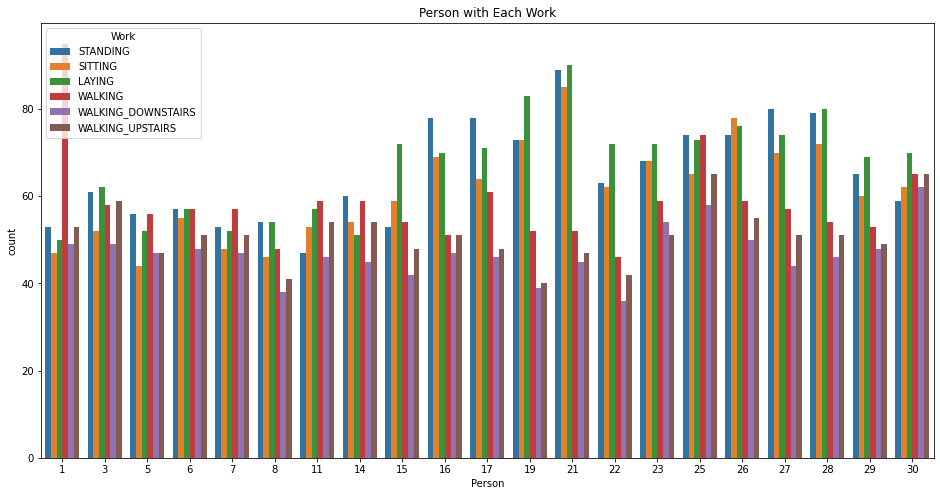

In [5]:
plt.figure(figsize = (16,8))
plt.title("Person with Each Work")
sns.countplot(hue = 'Work', x='Person',data = train);
plt.show()

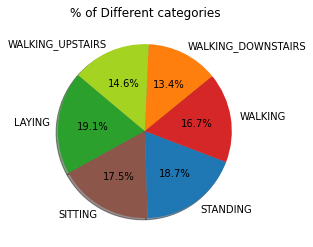

In [6]:
work = train['Work'].groupby(train['Work']).count().index
work_data = train['Work'].groupby(train['Work']).count().values
colors = ["#2ca02c", "#8c564b", "#1f77b4", "#d62728", "#ff7f0e","#a4d321"]#Adding different colors
plt.pie(work_data, labels=work,  colors=colors , autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("% of Different categories")
plt.show()

In [24]:
#CHECKING IF THERE ARE ANY NULL VALUES

In [25]:
print(train.isna().sum())

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
Person                  0
Work                    0
Length: 550, dtype: int64


In [26]:
# ABOVE DATA SHOWS THERE ARE NO NULL/MISSING VALUES PRESENT

In [27]:
x = train.drop(['Work'],axis=1)
y = train['Work']

In [28]:
#TRAINING MODEL
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [29]:
#DIFFERENT CLASSIFIERS USED INCLUDING DIFFERENT NEAREST NEIGHBORS AND DIFFENERT KERNELS FOR SVM
classifiers = [
    KNeighborsClassifier(5),
    KNeighborsClassifier(4),
    SVC(kernel="rbf"),
    SVC(kernel="linear"),
]
#using knn with k=5 and k=4(considering 5 and 4 nearest neighbors) and using different kernels for SVM linear(gaussian) and rbf

In [32]:
#FUNCTION FOR CALCULATING SCORES(ACCURACY),EXECUTION TIME USING KNN AND SVM FOR TRAINING DATA
def f_score(X_train, X_test, y_train, y_test):
    for clf in classifiers:
        s = time.time()
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        f = f1_score(y_true=y_test,y_pred=y_pred,average="macro")
        e = time.time()
        print(f"Accuracy Score: {round(f,3)} \t Execution Time(in secs): {round(e-s,3)} \t Classifier: {clf.__class__.__name__}")

f_score(X_train, X_test, y_train, y_test)  

Accuracy Score: 0.97 	 Execution Time(in secs): 4.118 	 Classifier: KNeighborsClassifier
Accuracy Score: 0.979 	 Execution Time(in secs): 4.102 	 Classifier: KNeighborsClassifier
Accuracy Score: 0.955 	 Execution Time(in secs): 13.983 	 Classifier: SVC
Accuracy Score: 0.984 	 Execution Time(in secs): 3.919 	 Classifier: SVC


In [33]:
#FUNCTION FOR CALCULATING SCORES(ACCURACY),EXECUTION TIME USING KNN AND SVM FOR TESTING DATA
test = pd.read_csv("test.csv")
test_x = test.drop(['Work'],axis=1)
test_y = test['Work']
score=f_score(x, test_x, y, test_y)
score

Accuracy Score: 0.808 	 Execution Time(in secs): 9.6 	 Classifier: KNeighborsClassifier
Accuracy Score: 0.81 	 Execution Time(in secs): 9.491 	 Classifier: KNeighborsClassifier
Accuracy Score: 0.928 	 Execution Time(in secs): 23.025 	 Classifier: SVC
Accuracy Score: 0.966 	 Execution Time(in secs): 6.343 	 Classifier: SVC
